In [1]:
!pip install opendatasets
!pip install contractions
!pip install autocorrect
!pip install openpyxl -U

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

# library imports
import pandas as pd
import opendatasets
import contractions
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import nltk
import re

In [2]:
tqdm_notebook.pandas()


In [3]:

# load the dataset
raw_data = pd.read_excel('BERT Dataset.xlsx')

In [4]:
raw_data .columns

Index(['Sentences', 'Broken Sentences', 'OpinionTerm1',
       'Predicted Opinion Term 1', 'Aspect Category1', 'AspectPolarity1 ',
       'OpinionTerm2', 'Predicted Opinion Term 2', 'Aspect Category2',
       'Aspectpolarity2'],
      dtype='object')

In [5]:
mapping = {
    'Company_Service': 'Company_Service',
    'App_Utility': 'App_Utility',
    'service_quality': 'service_quality',
    'service_person_attitude': 'service_person_attitude',
    'Cost': 'Cost',
    'App_UI': 'App_UI',
    'App_Functionality': 'App_Functionality',
    'service_schedule': 'service_schedule',
    'Customer_Support': 'Customer_Support',
    'cost': 'Cost',
    'Company_service': 'Company_Service',
    'Payment': 'Payment',
    'payment': 'Payment',
    'Customer_Suppor': 'Customer_Support'
}

# Replace variations with the standard name
raw_data['Aspect Category1'] = raw_data['Aspect Category1'].map(mapping)

In [6]:
raw_data.columns = raw_data.columns.str.strip()

In [7]:
print(raw_data['AspectPolarity1'].unique())


['positive' 'negative ' 'Positive' 'positive ']


In [8]:
# Assuming raw_data is your DataFrame

# Mapping with variations
mapping = {
    'positive': 'positive',
    'Positive': 'positive',
    'positive ': 'positive',
    'positive  ': 'positive',  # Add more variations as needed
    'negative': 'negative',
    'Negative': 'negative',
    'negative ': 'negative',
    'negative  ': 'negative'  # Add more variations as needed
}

# Apply the mapping after converting to lowercase for case-insensitivity
raw_data['AspectPolarity1'] = raw_data['AspectPolarity1'].str.lower().map(mapping)

# Check unique values
unique_values = raw_data['AspectPolarity1'].unique()
print(unique_values)



['positive' 'negative']


In [9]:
raw_data['AspectPolarity1'].unique()

array(['positive', 'negative'], dtype=object)

In [10]:

# define observation counts within each class
class_counts = raw_data['Aspect Category1'].value_counts()

In [11]:
class_counts

Aspect Category1
Company_Service            2366
App_Utility                 578
service_quality             574
service_person_attitude     189
Cost                        136
App_UI                       74
App_Functionality            66
service_schedule             51
Customer_Support             50
Payment                       9
Name: count, dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


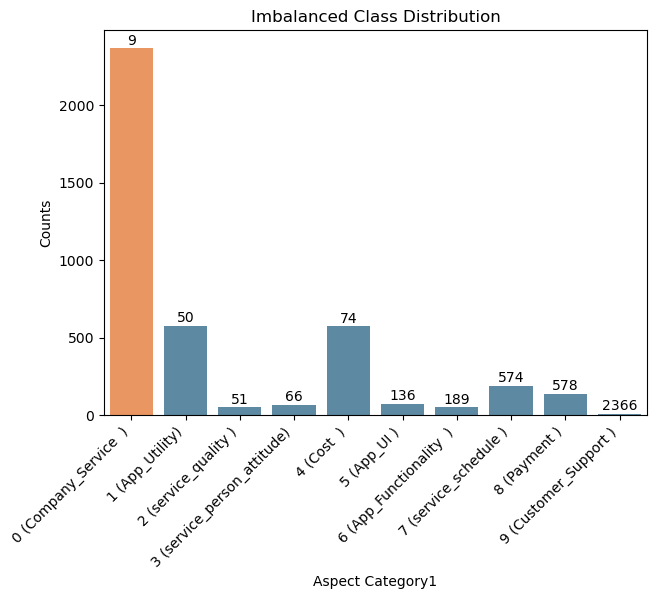

In [12]:
# display a bar chart of the distribution
plt.figure(figsize = (7, 5))

# define colors
colors = ['#528CAD' if (x < max(class_counts)) else '#FF914D' for x in class_counts]

ax = sns.countplot(x=raw_data['Aspect Category1'],
                   data=raw_data,
                   palette=colors)
ax.set(title='Imbalanced Class Distribution')

# place labels above each bar
vals = class_counts.to_list()
vals.sort()
ax_labels = vals
rects = ax.patches
labels = [ax_labels[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

# edit x-tick labels
ax.set_xticklabels(['0 (Company_Service  )', "1 (App_Utility)","2 (service_quality )","3 (service_person_attitude)","4 (Cost  )","5 (App_UI )","6 (App_Functionality  )","7 (service_schedule )","8 (Payment )","9 (Customer_Support )"],rotation=45, ha="right")

# y-axis label
ax.set_ylabel("Counts")

plt.show()

**Handling catgories **

In [13]:
from sklearn.utils import resample
import pandas as pd
import numpy as np

# Assuming raw_data is your DataFrame

# List of categories to upsample
categories_to_upsample = ['App_Utility', 'service_quality', 'service_person_attitude', 'Cost', 'App_UI', 'App_Functionality', 'service_schedule', 'Customer_Support', 'Payment']

# Unique values in the 'polarity' column (assuming it has two values, e.g., 'positive' and 'negative')
#polarity_values = ['positive', 'negative']

# Empty DataFrame to store the upsampled data
upsampled_data = pd.DataFrame()

np.random.seed(42)

for category in categories_to_upsample:
    #for polarity_value in polarity_values:
        # Calculate the number of samples needed for each category and polarity
        target_count = np.random.randint(2000, 2501)

        # Upsample the minority class for each category and polarity
        upsampled_category = resample(
            raw_data[(raw_data['Aspect Category1'] == category)],
            replace=True,
            n_samples=target_count,
            random_state=42
        )

        # Concatenate the upsampled category and polarity with the rest of the data
        upsampled_data = pd.concat([upsampled_data, upsampled_category])

# Combine the upsampled minority classes with the rest of the data
dataset = pd.concat([raw_data[~raw_data['Aspect Category1'].isin(categories_to_upsample)], upsampled_data])

# Print the count after upsampling for each category and polarity
for category in categories_to_upsample:
    #for polarity_value in polarity_values:
        count = len(upsampled_data[(upsampled_data['Aspect Category1'] == category)])
        print(f"Count of '{category}': {count}")


# Print the total count after upsampling
print(f"Total count after upsampling: {len(dataset)}")



Count of 'App_Utility': 2102
Count of 'service_quality': 2435
Count of 'service_person_attitude': 2348
Count of 'Cost': 2270
Count of 'App_UI': 2106
Count of 'App_Functionality': 2071
Count of 'service_schedule': 2188
Count of 'Customer_Support': 2020
Count of 'Payment': 2102
Total count after upsampling: 22079


**Aspectpolairty1**

In [14]:
class_counts = dataset['AspectPolarity1'].value_counts()

In [15]:
class_counts

AspectPolarity1
positive    13815
negative     8264
Name: count, dtype: int64

In [16]:
dataset.to_excel("separate_Upsampled_Dataset.xlsx",
                 header=True,
                 index=False)

In [17]:
# load the dataset
unsample_data = pd.read_excel('separate_Upsampled_Dataset.xlsx')

In [18]:
## print the top5 records
unsample_data.head()

,Sentences,Broken Sentences,OpinionTerm1,Predicted Opinion Term 1,Aspect Category1,AspectPolarity1,OpinionTerm2,Predicted Opinion Term 2,Aspect Category2,Aspectpolarity2
0,excellent service....very professional electri...,"['excellent service', '.very professional elec...",excellent service,excellent service,Company_Service,positive,professional electricians,professional electrician,service_person_attitude,positive
1,nice facilities and rates is to much high,"['nice facilities ', ' rates is to much high']",nice facilities,nice facilities,Company_Service,positive,much high,to much,cost,negative
2,Very Very Helpful and Useful . Excellent Exper...,"['Very Very Helpful and Useful ', ' Excellent ...",helpful,very helpful,NaN,positive,excellent experience,excellent experience,Company_Service,positive
3,great helping hand. economical.,"['great helping hand', ' economical']",helping hand,helping hand,Company_Service,positive,economical,NaN,cost,positive
4,"Very helpful, very fast service","['Very helpful', ' very fast service']",helpful,very helpful,NaN,positive,fast service,fast service,Company_Service,positive


In [19]:
## print shape of dataset with  rows and columns
print(unsample_data.shape)

(22079, 10)


In [20]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in unsample_data.columns if unsample_data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(unsample_data[feature].isnull().mean(), 2),  ' % missing values')

Predicted Opinion Term 1 0.09  % missing values
Aspect Category1 0.0  % missing values
OpinionTerm2 0.72  % missing values
Predicted Opinion Term 2 0.62  % missing values
Aspect Category2 0.72  % missing values
Aspectpolarity2 0.72  % missing values


In [21]:
# Specify the columns to save
columns_to_save = ['Sentences', 'OpinionTerm1', 'Aspect Category1', 'AspectPolarity1']

# Create a new DataFrame 'df' with specific columns from 'unsample_data'
df = unsample_data[columns_to_save].copy()

In [22]:
df.head()

,Sentences,OpinionTerm1,Aspect Category1,AspectPolarity1
0,excellent service....very professional electri...,excellent service,Company_Service,positive
1,nice facilities and rates is to much high,nice facilities,Company_Service,positive
2,Very Very Helpful and Useful . Excellent Exper...,helpful,NaN,positive
3,great helping hand. economical.,helping hand,Company_Service,positive
4,"Very helpful, very fast service",helpful,NaN,positive


In [23]:
# Check the number of samples in sentences and labels
print(len(df['Sentences']))
print(len(df[['OpinionTerm1', 'Aspect Category1', 'AspectPolarity1']].values))


22079
22079


# final model 

In [ ]:
import torch
from transformers import BertTokenizer, BertForTokenClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Replace NaN values with an empty string or handle them based on your requirements
df = df.fillna("")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define a function to tokenize and prepare the input data
def prepare_data(sentences, labels, max_len=128):
    # Ensure 'sentences' is a list of strings
    sentences = list(sentences.astype(str))
    
    # Tokenize inputs
    tokenized_inputs = tokenizer(sentences, padding=True, truncation=True, max_length=max_len, return_tensors="pt")
    
    # Convert labels to tensor
    labels_list = []

    for row in labels:
        # Handle NaN values for each element in the row
        processed_labels = [
            tokenizer.encode(str(label), add_special_tokens=False) if pd.notna(label) else [0]
            for label in row
        ]

        # Flatten the list
        flattened_labels = [item for sublist in processed_labels for item in sublist]

        # Pad or truncate the label sequence
        padding_length = max_len - len(flattened_labels)
        if padding_length > 0:
            padding = np.zeros(padding_length, dtype=int)
            flattened_labels += list(padding)
        else:
            flattened_labels = flattened_labels[:max_len]

        labels_list.append(flattened_labels)
    
    labels_tensor = torch.tensor(labels_list)

    return tokenized_inputs, labels_tensor

# Split the data into training and testing sets with consistent random_state
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare training data
train_inputs, train_labels = prepare_data(train_df['Sentences'], train_df[['OpinionTerm1', 'Aspect Category1', 'AspectPolarity1']].values, max_len)

# Prepare testing data
test_inputs, test_labels = prepare_data(test_df['Sentences'], test_df[['OpinionTerm1', 'Aspect Category1', 'AspectPolarity1']].values, max_len)

# Train the model
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
epochs = 1

for epoch in range(epochs):
    outputs = model(**train_inputs, labels=train_labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(**test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(test_outputs.logits, dim=2).numpy()

# Flatten the predictions and true labels
flat_predicted_labels = predicted_labels.flatten()
flat_true_labels = test_labels.flatten().numpy()

# Print classification report
print(classification_report(flat_true_labels, flat_predicted_labels))

# Now, you can use the trained model to make predictions on new sentences
def predict(sentence):
    # Prepare the input data for prediction
    tokenized_sentence = tokenizer(sentence, padding=True, truncation=True, max_length=max_len, return_tensors="pt")
    
    # Make predictions
    with torch.no_grad():
        model.eval()
        outputs = model(**tokenized_sentence)
        predicted_labels = torch.argmax(outputs.logits, dim=2).numpy()
    
    # Map the predicted labels back to the original classes
    predicted_opinion_term = tokenizer.decode(predicted_labels[0][:max_len])
    predicted_aspect_category = tokenizer.decode(predicted_labels[1][:max_len])
    predicted_aspect_polarity = tokenizer.decode(predicted_labels[2][:max_len])
    
    return predicted_opinion_term, predicted_aspect_category, predicted_aspect_polarity

# Example usage
sentence_to_predict = "The food quality was amazing."
predicted_opinion_term, predicted_aspect_category, predicted_aspect_polarity = predict(sentence_to_predict)

print("Predicted Opinion Term:", predicted_opinion_term)
print("Predicted Aspect Category:", predicted_aspect_category)
print("Predicted Aspect Polarity:", predicted_aspect_polarity)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Model

In [37]:

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(unsample_data, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from tqdm import tqdm

# Load your dataset
# Assuming your dataset is in a CSV file
df = unsample_data

# Split the dataset
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# Use LabelEncoder on the entire set of unique labels
label_encoder = LabelEncoder()
label_encoder.fit(df['OpinionTerm1'])

# Transform labels for both training and validation sets
train_data['label'] = label_encoder.transform(train_data['OpinionTerm1'])
val_data['label'] = label_encoder.transform(val_data['OpinionTerm1'])

# BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, sentences, labels):
        self.sentences = sentences
        self.labels = labels

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        return {'text': self.sentences[idx], 'label': self.labels[idx]}

# Tokenize the data
train_dataset = CustomDataset(
    sentences=train_data['Sentences'].tolist(),
    labels=train_data['label'].tolist()
)
val_dataset = CustomDataset(
    sentences=val_data['Sentences'].tolist(),
    labels=val_data['label'].tolist()
)


# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['OpinionTerm1'].unique()))

# Training the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs = tokenizer(batch['text'], padding=True, truncation=True, return_tensors='pt')
        labels = torch.tensor(batch['label']).to(device)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [43]:
# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in tqdm(val_loader, desc='Evaluating'):
        inputs = tokenizer(batch['text'], padding=True, truncation=True, return_tensors='pt')
        labels = torch.tensor(batch['label']).to(device)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        outputs = model(**inputs, labels=labels)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Evaluating:   0%|                                                                              | 0/552 [00:00<?, ?it/s]C:\Users\HP\AppData\Local\Temp\ipykernel_13592\3971342625.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch['label']).to(device)
Evaluating: 100%|████████████████████████████████████████████████████████████████████| 552/552 [03:38<00:00,  2.53it/s]

Accuracy: 85.28%
